# Exploratory Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

# progress bar
from tqdm import tqdm_notebook

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# feature selection
from sklearn.feature_selection import VarianceThreshold

# modeling
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold

# validation
from sklearn.metrics import roc_auc_score

import warnings
import multiprocessing
warnings.filterwarnings('ignore')

### Load Data

In [2]:
%%time 
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

CPU times: user 18.4 s, sys: 1.91 s, total: 20.3 s
Wall time: 19.7 s


In [3]:
%%time
# loading with multiprocessing
def load_data(data):
    return pd.read_csv(data)

with multiprocessing.Pool() as pool:
    train, test, sub = pool.map(load_data, ['../data/train.csv', '../data/test.csv', '../data/sample_submission.csv'])
    

CPU times: user 846 ms, sys: 1.83 s, total: 2.68 s
Wall time: 18 s


In [4]:
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


In [5]:
train.shape

(262144, 258)

In [6]:
np.sqrt(train.shape[0])

512.0

In [7]:
train['target'].value_counts(normalize = True)

1    0.500225
0    0.499775
Name: target, dtype: float64

Class is balanced.

In [53]:
test.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
0,1c13f2701648e0b0d46d8a2a5a131a53,-5.490030,0.593976,1.532732,-0.361234,-0.155282,-1.340582,1.626819,4.280084,-0.340155,...,0.386831,0.817764,-1.215121,0.238812,-0.507346,1.360599,-1.743894,1.412043,-0.562730,-0.237948
1,ba88c155ba898fc8b5099893036ef205,0.571698,0.495494,1.133975,-0.315875,-2.142458,-0.478650,-1.458941,0.977352,0.159189,...,-1.120400,-0.953432,0.266619,-2.088512,0.252637,-1.034676,-0.804765,0.639112,1.172667,-1.666513
2,7cbab5cea99169139e7e6d8ff74ebb77,0.478202,-1.429985,0.410429,-1.329215,-0.888456,0.721798,-0.809630,-0.216637,4.038961,...,1.330744,-0.757244,1.289617,1.824534,-0.306249,-0.875231,-0.436228,0.007315,-0.841215,1.099160
3,ca820ad57809f62eb7b4d13f5d4371a0,0.124178,-0.347069,-0.457690,1.248395,0.368441,0.832838,-2.050084,3.168626,-0.399716,...,-0.839954,-2.029489,3.218734,1.091271,1.384581,-0.313402,-0.816372,1.079761,-0.168144,0.102878
4,7baaf361537fbd8a1aaa2c97a6d4ccc7,-1.806586,0.660947,-0.004663,-3.383956,1.018235,1.670834,-0.208904,0.124925,0.224575,...,0.024204,0.680223,0.801870,-0.681506,1.340432,-0.645714,0.002157,0.733017,2.039239,0.842452


In [29]:
%%time 
unique_value_counts = train.apply(lambda col: len(col.unique()))

In [31]:
unique_value_counts.sort_values()

target                                     2
wheezy-copper-turtle-magic               512
lanky-coral-moorhen-expert            253919
shaggy-silver-indri-fimbus            253956
baggy-copper-oriole-dummy             253989
wheezy-harlequin-earwig-gaussian      254004
chummy-ruby-chinook-dataset           254063
scanty-periwinkle-dhole-dataset       254083
gloppy-persimmon-bee-unsorted         254083
seedy-charcoal-capybara-ordinal       254093
tasty-buff-monkey-learn               254097
cheeky-red-armadillo-unsorted         254117
dorky-turquoise-maltese-important     254122
slimy-azure-molly-sumble              254123
nerdy-teal-olm-fepid                  254136
snippy-auburn-vole-learn              254154
crabby-teal-otter-unsorted            254164
crappy-carmine-eagle-entropy          254165
snappy-gamboge-caterpillar-dummy      254167
lousy-asparagus-tiger-discard         254170
ugly-tangerine-chihuahua-important    254170
lovely-plum-goat-novice               254187
gamy-white

`wheezy-copper-turtle-magic` looks like a categorical variable, from 0 to 511.

In [178]:
train['wheezy-copper-turtle-magic'].min(), train['wheezy-copper-turtle-magic'].max()

(0, 511)

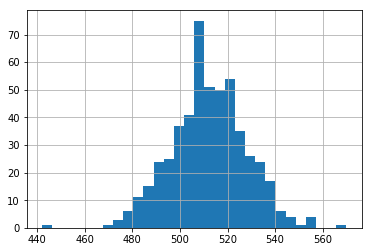

In [186]:
train.groupby("wheezy-copper-turtle-magic").size().hist(bins = 30)

## Modeling

### Quadratic Discriminatory Analysis (QDA)

### Pseudo Labeling
The process of adding confident predicted test data to your training data. It is a 5 step process:

1. Build a model using training data
2. Predict labels for an unseen test dataset
3. Add confident predicted test observations to out training data
4. Build a new model using combined data
5. Use your new model to predict the test data and submit to Kaggle.

### Step 1 & 2 - Build initial QDA model and predict test data

In [340]:
# initialize variables
cols = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]

# oof = Out Of Fold predictions
oof = np.zeros(len(train))
preds = np.zeros(len(test))

In [341]:
%%time 

# build 512 models, one for each value of wheezy-copper-turtle-magic
for i in tqdm_notebook(range(512)):
    # segment data
    train_i = train[train['wheezy-copper-turtle-magic'] == i]
    test_i = test[test['wheezy-copper-turtle-magic'] == i]
    
    idx1 = train_i.index
    idx2 = test_i.index
    
    train_i.reset_index(drop=True, inplace=True)
    
    # feature selection
    sel = VarianceThreshold(threshold=1.5).fit(train_i[cols])
    
    train_sel = sel.transform(train_i[cols])
    test_sel = sel.transform(test_i[cols])
    
    # stratified K-fold
    skf = StratifiedKFold(n_splits=11, random_state=42, shuffle=True)
    
    for train_idx, test_idx in skf.split(train_sel, train_i['target']):
        # model and predict with QDA
        
        # instantiate model
        clf = QuadraticDiscriminantAnalysis(reg_param=0.5)
        
        # fit model
        clf.fit(train_sel[train_idx, :], train_i.loc[train_idx, 'target'])
        
        # predict probability
        oof[idx1[test_idx]] = clf.predict_proba(train_sel[test_idx, :])[:, 1]
        preds[idx2] += clf.predict_proba(test_sel)[:, 1] / skf.n_splits
        


CPU times: user 1min 18s, sys: 853 ms, total: 1min 18s
Wall time: 20.1 s


In [342]:
# model evaluation
train_auc = roc_auc_score(train['target'], oof)
print('QDA train scores:', round(train_auc, 5))

QDA train scores: 0.96541


### Step 3 & 4 -  Add pseudo label data and build second model

#### Label confident predictions

In [343]:
# label confident predictions
test['target'] = preds

neg_confidence_threshold = .0001
pos_confidence_threshold = .9999

test_pseudo = test.copy()
test_pseudo.loc[test_pseudo['target'] >= pos_confidence_threshold, 'target'] = 1
test_pseudo.loc[test_pseudo['target'] <= neg_confidence_threshold, 'target'] = 0

#### Combine data

In [344]:
test_pseudo = test_pseudo[(test_pseudo['target'] == 1) | (test_pseudo['target'] == 0)]
train_pseudo = pd.concat([train, test_pseudo]).reset_index(drop=True)

#### Model with combined data

In [345]:
train.shape

(262144, 258)

In [346]:
train_pseudo.shape

(354611, 258)

In [347]:
%%time 
oof2 = np.zeros(len(train))
preds2 = np.zeros(len(test))

# build 512 seperate models
for i in tqdm_notebook(range(512)):
    # segment data
    train_i = train[train['wheezy-copper-turtle-magic'] == i]
    test_i = test[test['wheezy-copper-turtle-magic'] == i]
    test_i_pseudo = test_pseudo[test_pseudo['wheezy-copper-turtle-magic'] == i]
    
    idx1 = train_i.index
    idx2 = test_i.index
    
    train_i_pseudo = pd.concat([train_i, test_i_pseudo], axis=0).reset_index(drop=True)
    
    # get pseudo labeled data
    # confident predictions <= 0.01 or >= 0.99
#     test_i_pseudo = test_i[(test_i['target'] <= confidence_threshold_neg) | 
#                            (test_i['target'] >= confidence_threshold_pos)].copy()
    
#     test_i_pseudo = test_i_pseudo.apply(lambda row: 1 if row['target'] >= threshold else 0)
#     test_i_pseudo.loc[test_i_pseudo['target'] >= 0.5, 'target'] = 1
#     test_i_pseudo.loc[test_i_pseudo['target'] <  0.5, 'target'] = 0

    # append pseudo labeled data to train data
#     train_i_pseudo = pd.concat([train_i_pseudo, test_i_pseudo], axis=0)
#     train_i_pseudo.reset_index(drop=True, inplace=True)

    # feature selection
    sel = VarianceThreshold(threshold=1.5).fit(train_i_pseudo[cols])

    train_sel_pseudo = sel.transform(train_i_pseudo[cols])
    train_sel = sel.transform(train_i[cols])
    test_sel = sel.transform(test_i[cols])
    
    # stratified K-fold
    skf = StratifiedKFold(n_splits=11, random_state=42, shuffle=True)

    for train_idx, test_idx in skf.split(train_sel_pseudo, train_i_pseudo['target']):
        test_idx_sel = test_idx[test_idx < len(train_sel)] # ignore pseudo in oof
        # model and predict with QDA
        
        # instantiate model
        clf = QuadraticDiscriminantAnalysis(reg_param=0.5)
            
        # fit model
        clf.fit(train_sel_pseudo[train_idx,:], train_i_pseudo.loc[train_idx]['target'])

        # predict probability
        oof2[idx1[test_idx_sel]] = clf.predict_proba(train_sel[test_idx_sel, :])[:, 1]
        preds2[test_i.index] += clf.predict_proba(test_sel)[:,1] / skf.n_splits
        


CPU times: user 1min 36s, sys: 973 ms, total: 1min 37s
Wall time: 24.8 s


In [348]:
# model evaluation
train_auc = roc_auc_score(train['target'], oof2)
print('Pseudo Labeled QDA train score:', round(train_auc,5))


Pseudo Labeled QDA train score: 0.97027


In [112]:
.025*train.shape[0]

6553.6

In [111]:
len(oof[(oof >= .48) & (oof <= .52)])

381

### Flipping Misclassified Targets

Attempt 1:  
Flip 2.5% of false positives and false negatives **randomly**.

Attempt 2:  
Flip 2.5% of FPs and FNs where predicted probability was closest to `0.5`.

#### Flipping Randomly

In [146]:
from heapq import nsmallest
from sklearn.metrics import confusion_matrix

In [166]:
confusion_matrix(train['target'], np.round(oof))

array([[123086,   7927],
       [  7784, 123347]])

In [165]:
tn, fp, fn, tp = confusion_matrix(train['target'], np.round(oof)).ravel()

In [172]:
from sklearn.metrics import accuracy_score

In [174]:
accuracy_score(train['target'], np.round(oof))

0.9400672912597656

In [171]:
flip_pct = 0.025
print(int(flip_pct * fp))
print(int(flip_pct * fn))


198
194


In [ ]:
train.loc[np.random.choice(misclass.index, flip_pct)]['target']

In [219]:
# get distribution of probabilities of correct predictions
correct_mask = train['target'] - np.round(oof) == 0
misclass_mask = train['target'] - np.round(oof) != 0
correct = train['target'][correct_mask]
misclass = train['target'][misclass_mask]

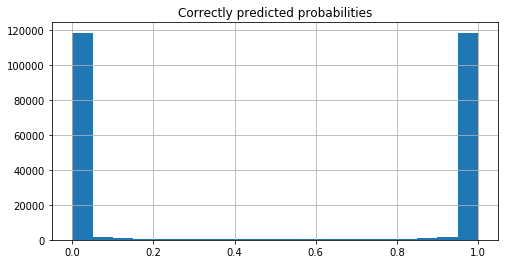

In [225]:
plt.figure(figsize = (8, 4))
plt.title('Correctly predicted probabilities')
pd.Series(oof).loc[correct.index].hist(bins = 20)

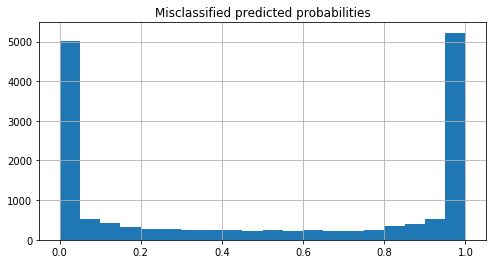

In [223]:
plt.figure(figsize = (8, 4))
plt.title('Misclassified predicted probabilities')
pd.Series(oof).loc[misclass.index].hist(bins = 20)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 9,     10,
            ...
            262133, 262134, 262135, 262136, 262137, 262138, 262139, 262140,
            262141, 262143],
           dtype='int64', length=246433)

In [154]:
nsmallest(3, oof, key = lambda x: abs(x-0.5))

[0.5000557288705957, 0.5001215954993877, 0.4998263601269167]

### Submission

In [99]:
sub = pd.read_csv('../data/sample_submission.csv')
sub['target'] = preds
sub.to_csv('../predictions/submission.csv', index=False)